# Mercari Price Prediction Exploratory Data Analysis (EDA)

This is an initial Explanatory Data Analysis for the Mercari Price Suggestion Challenge with matplotlib. The competition is hosted by Mercari, the biggest Japanese community-powered shopping app with the main objective to predict an accurate price that Mercari should suggest to its sellers, given the item's information.

Below we will start by importing the necessary libraries at Python's disposal to perform some visual and detailed analysis of the data before moving onto the machine learning portion of the project:

In [1]:
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import squarify
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#Term frequency vectorizer
from sklearn.model_selection import train_test_split
import re
import xgboost
import scipy

### Initial Look:

#### Here we will look at the data overview, tables, and some simple graphs of the target variable and transformations before we delve into each individual category and its relation to the target.

In [2]:
train = pd.read_csv("train.tsv", sep='\t', header=0)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


#### Already the data appears to have some numerical values, but also has string based features that we will have to transform. The price feature will be our target variable.

In [3]:
test = pd.read_csv("test.tsv", sep='\t', header=0)
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [4]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [6]:
train.shape

(1482535, 8)

In [7]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

#### Before we move forward, since this is an exercise that will require text analysis, we will be converting the objects representing the categories into strings and remove punctuations and other symbols that may interfere with our data.

In [8]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [9]:
train = train[pd.notnull(train['item_description'])]

## I. Initial Look (Target Variable): Price graphs

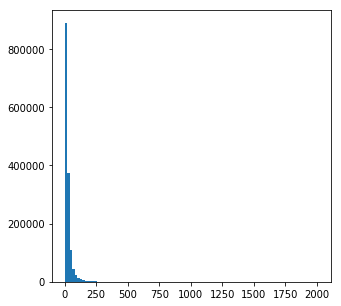

In [10]:
plt.figure(figsize=(5,5))
plt.hist(train['price'], bins = 100)
plt.show()

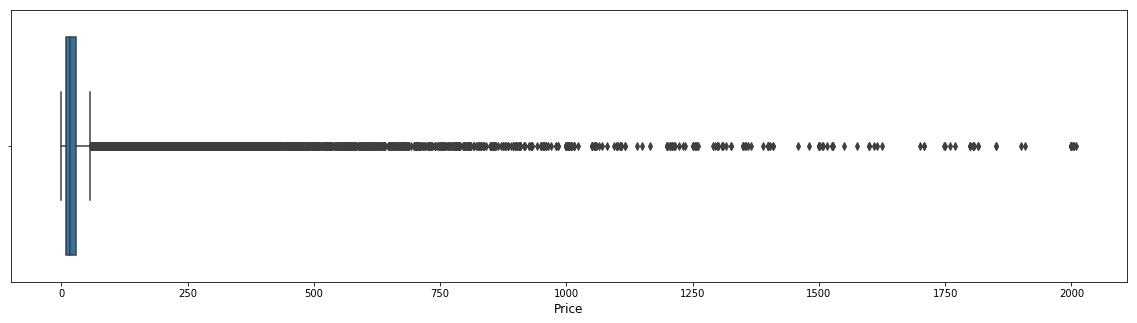

In [11]:
plt.figure(figsize= (20,5)) 
sns.boxplot(train.price, )
plt.xlabel("Price", fontsize='large')
plt.show()

In [12]:
train['price'].describe()

count    1.482531e+06
mean     2.673754e+01
std      3.858611e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

#### Our target variable is definitely exponentially distributed and skewed to the right. We will have to take a log of this feature as a response to this skew. The average price is $26.73. Let's see what taking the log does to the price variable:

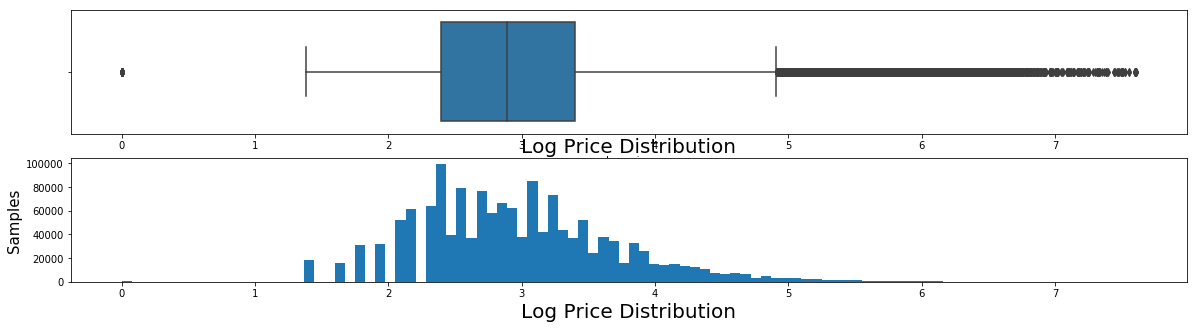

In [13]:
train["log_price"] = np.log(train["price"] + 1)
fig, ax = plt.subplots(2, 1, figsize = (20, 5))
sns.boxplot(train.log_price, ax = ax[0])
ax[1].hist(train.log_price, bins = 100)
ax[1].set_title("Log Price Distribution", fontsize = 20)
ax[1].set_xlabel("Log Price Distribution", fontsize = 20)
ax[1].set_ylabel("Samples", fontsize = 15)
plt.show()

#### Taking the log (+1 to avoid 0 or negative values) has allowed the target variable to assume a Gaussian distribution. This is what we will use to train the models.

## II. Shipping

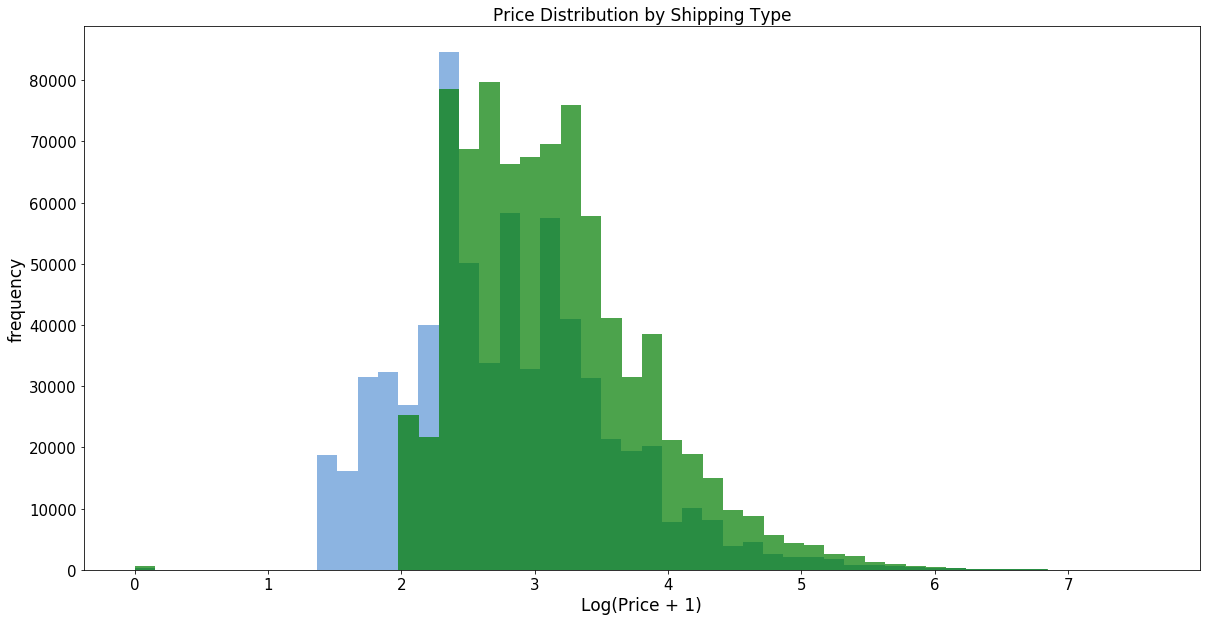

In [14]:
shipping_seller_price = train.loc[train.shipping==1, 'price']
shipping_buyer_price = train.loc[train.shipping==0, 'price']

fig, ax = plt.subplots(figsize=(20,10))
ax.hist(np.log(shipping_seller_price+1), color='#8CB4E1', alpha=1.0, bins=50,
       label='Price when Seller pays Shipping')
ax.hist(np.log(shipping_buyer_price+1), color='#007D00', alpha=0.7, bins=50,
       label='Price when Buyer pays Shipping')
ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
plt.xlabel('Log(Price + 1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.title('Price Distribution by Shipping Type', fontsize=17)

plt.tick_params(labelsize=15)

plt.show()



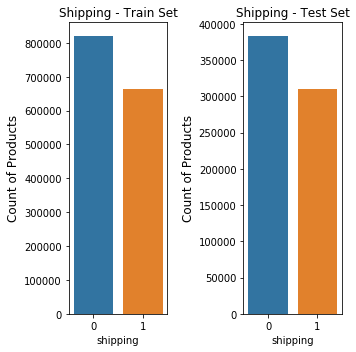

In [15]:
_ = plt.figure(figsize=(5,5))
_ = plt.subplot(1,2,1)
_ = sns.countplot(train['shipping'])
_ = plt.ylabel("Count of Products", fontsize='large')
_ = plt.title('Shipping - Train Set')


_ = plt.subplot(1,2,2)
_ = sns.countplot(test['shipping'])
_ = plt.ylabel("Count of Products", fontsize='large')
_ = plt.title('Shipping - Test Set')

plt.tight_layout()
plt.show()

## III. Categories

In [16]:
train['category_name'].head()

0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
Name: category_name, dtype: object

In [17]:
print('unique categories: ', train['category_name'].nunique())
print('unique products: ', train['name'].nunique())

unique categories:  1287
unique products:  1225270


#### There are 1,287 unique categories and 1,214,053 products within those cateogires. These labels will be able to help determine what price each product will be. Let us look at some stats on these categories in more detail:

In [18]:
print('Top Ten Categories:')
train['category_name'].value_counts()[:10]

Top Ten Categories:


Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29909
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Tank, Cami                                20284
Women/Tops & Blouses/Blouse                                    20284
Name: category_name, dtype: int64

#### Womens, Beauty, and Electronics come at the top ten frequency of products for raw categories. The dataset provide valuable information about the primary kinds of customer community that Mercari may most likely have. There is not gender designation or order details, but there seems to be a large frequency of Women's beauty products and clothing. Let us see the price breakdowns of products:

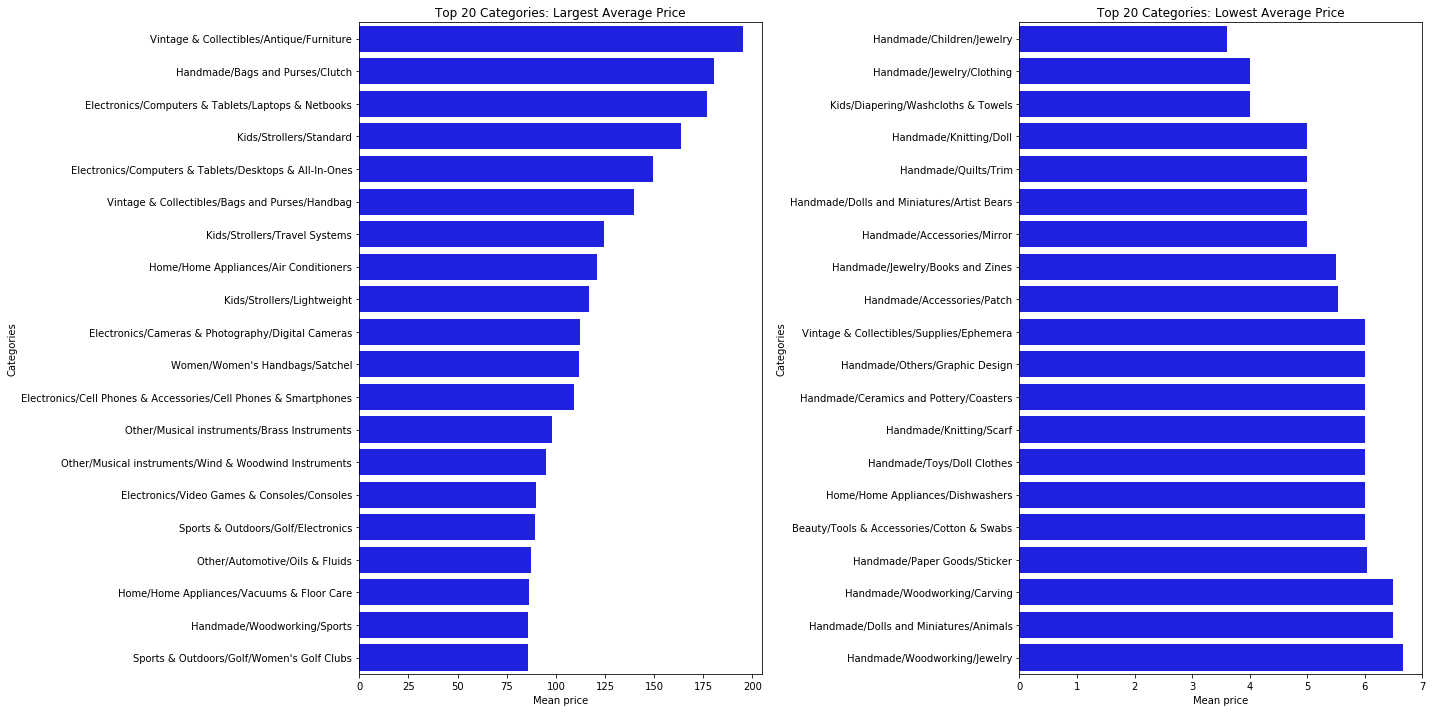

In [19]:
categories = train.groupby(train.category_name)
price = pd.DataFrame(categories['price'].mean())
high_price = price.sort_values(by='price', ascending = False).head(20)
high_price.reset_index(level=0, inplace=True)
low_price = price.sort_values(by='price', ascending = True).head(20)
low_price.reset_index(level=0, inplace=True)

plt.figure(figsize=(20,10))
_ = plt.subplot(1,2,1)
_ = sns.barplot(x = 'price', y = 'category_name', data = high_price, orient = 'h', color = 'b')
_ = plt.title('Top 20 Categories: Largest Average Price')
_ = plt.ylabel('Categories')
_ = plt.xlabel('Mean price')


_ = plt.subplot(1,2,2)
_ = sns.barplot(x = 'price', y = 'category_name', data = low_price, orient = 'h', color = 'b')
_ = plt.title('Top 20 Categories: Lowest Average Price')
_ = plt.ylabel('Categories')
_ = plt.xlabel('Mean price')

plt.tight_layout()
plt.show()

#### From the graphs above, we can see that most products tend to fall within a three category breakdown for identifying departments. These may come in handy as the breakdowns might reveal factors that determine average prices within each pairing. Let's look at average prices and differences we might see in the aggregate form of these categories:

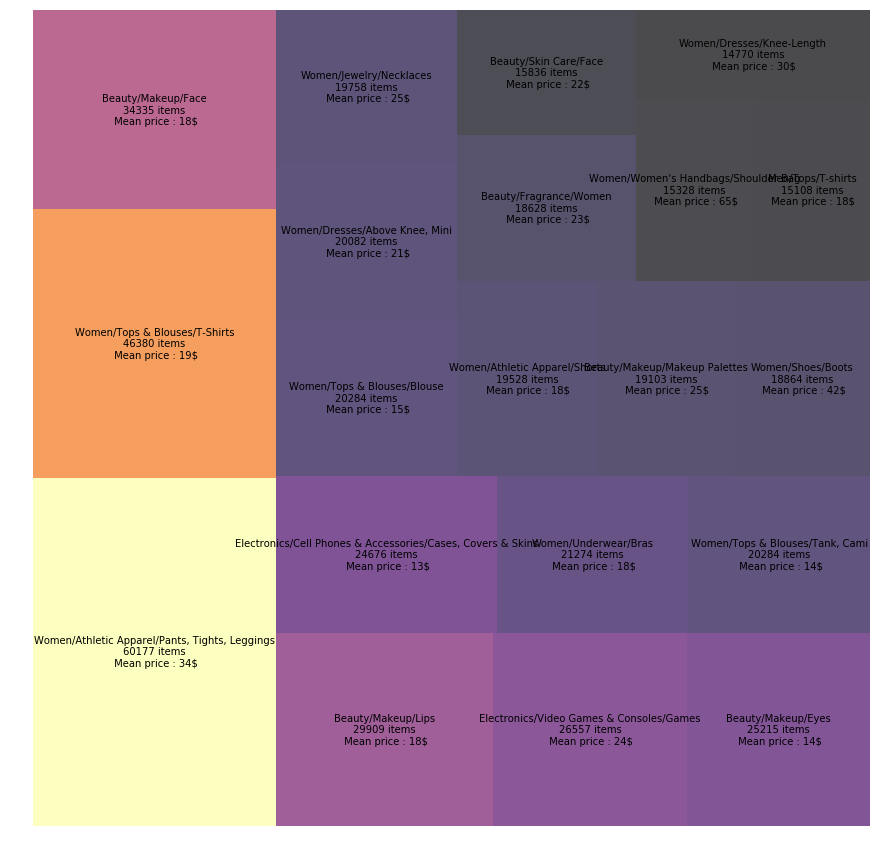

In [20]:
categories = pd.DataFrame(train.category_name.value_counts())
categories.reset_index(level = 0, inplace=True)
categories = categories.sort_values(by='category_name', ascending = False).head(20)
categories.columns =('category_name', 'size')

# Price by category
group = train.groupby(train.category_name)
mean_price = group.price.mean()
mean_price = pd.DataFrame(mean_price)
mean_price.reset_index(level = 0, inplace=True)

# Merging
categories = pd.merge(categories, mean_price, how='left', on = 'category_name')

# Colors setting
cmap = plt.cm.inferno
mini=min(categories['size'])
maxi=max(categories['size'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in categories['size']]

# Labels setting
labels = ["%s\n%d items\n Mean price : %d$" % (label) \
          for label in zip(categories['category_name'], categories['size'], categories['price'])]

# Plotting
plt.figure(figsize=(15,15))
plt.rc('font', size=10)
squarify.plot(sizes = categories['size'], label = labels, alpha = .7, color=colors)
plt.axis('off')
plt.show()

#### We see that the breakdown of aggregated categories can indeed be more granular. We can try to break the "category_name" field into three distinct columns, but for text based vectorization, three distinct columns with multiple combinations may not be ideal and may cause overfitting of data. For this case, we will take the primary category and secondary category for more granularity.

In [21]:
train.category_name

0                                          Men/Tops/T-shirts
1          Electronics/Computers & Tablets/Components & P...
2                                Women/Tops & Blouses/Blouse
3                         Home/Home Décor/Home Décor Accents
4                                    Women/Jewelry/Necklaces
5                                          Women/Other/Other
6                                   Women/Swimwear/Two-Piece
7                            Sports & Outdoors/Apparel/Girls
8                            Sports & Outdoors/Apparel/Girls
9                   Vintage & Collectibles/Collectibles/Doll
10                                        Beauty/Makeup/Face
11                                    Beauty/Fragrance/Women
12                            Women/Dresses/Above Knee, Mini
13                     Other/Office supplies/School Supplies
14                                         Women/Shoes/Boots
15                                 Beauty/Makeup/Makeup Sets
16                      

In [22]:
dfs = [train,test]
for i in (dfs):
    i['primary_cat'] = i.category_name.str.extract('([^/]+)/[^/]+/[^/]+')
    i['secondary_cat'] = i.category_name.str.extract('[^/]+/([^/]+/[^/]+)')

#train['primary_cat'] = i.category_name.str.extract('([^/]+)/[^/]+/[^/]+')
#train['secondary_cat'] = i.category_name.str.extract('[^/]+/([^/]+/[^/]+)')





c:\users\kj.park\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kj.park\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [23]:
print('unique primary categories: \n',train['primary_cat'].nunique())
print('unique secondary categories: \n',train['secondary_cat'].nunique())

unique primary categories: 
 10
unique secondary categories: 
 1198


In [24]:
train['secondary_cat']

0                                              Tops/T-shirts
1                     Computers & Tablets/Components & Parts
2                                      Tops & Blouses/Blouse
3                              Home Décor/Home Décor Accents
4                                          Jewelry/Necklaces
5                                                Other/Other
6                                         Swimwear/Two-Piece
7                                              Apparel/Girls
8                                              Apparel/Girls
9                                          Collectibles/Doll
10                                               Makeup/Face
11                                           Fragrance/Women
12                                  Dresses/Above Knee, Mini
13                           Office supplies/School Supplies
14                                               Shoes/Boots
15                                        Makeup/Makeup Sets
16                      

#### There are 10 main categories (basically like aisles), 1198 secondary categories (aisle contents). We could split this even further, but in doing so, we would most likely create an issue with dimensionality.

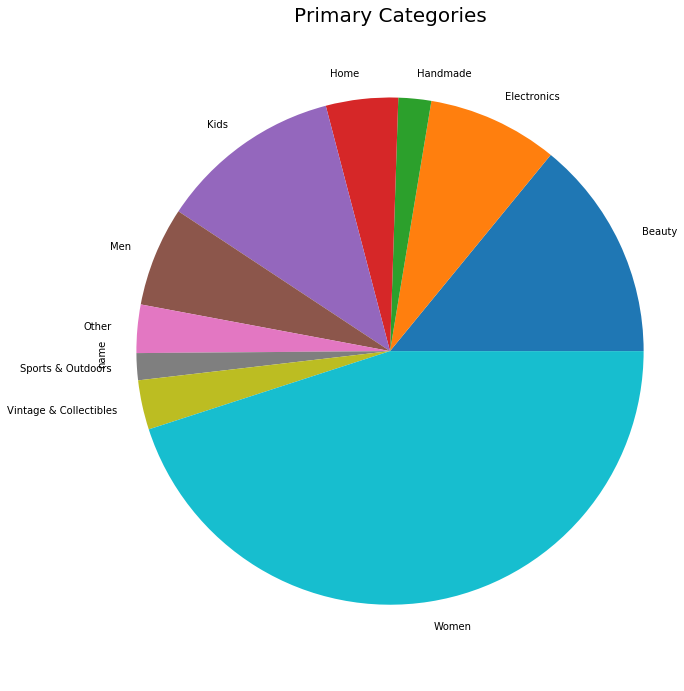

In [25]:
plt.figure(figsize = (10,12))
train.name.groupby(train.primary_cat).count().plot(kind = 'pie')
plt.title ('Primary Categories', fontsize = 20)
plt.axis('equal')
plt.show()

#### The plot below will explore the relation of log price to the primary categories:

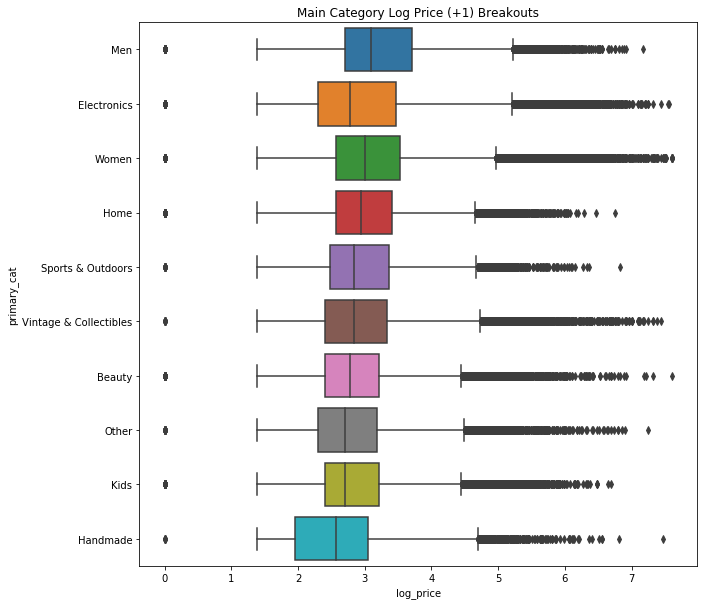

In [26]:
plt.figure(figsize = (10,10))
plt.title('Main Category Log Price (+1) Breakouts')
plt.xlabel("Log Price +1")
plt.ylabel("Primary Categories")
ax = sns.boxplot(x = 'log_price' , y ="primary_cat", data=train, orient="h")
plt.show()

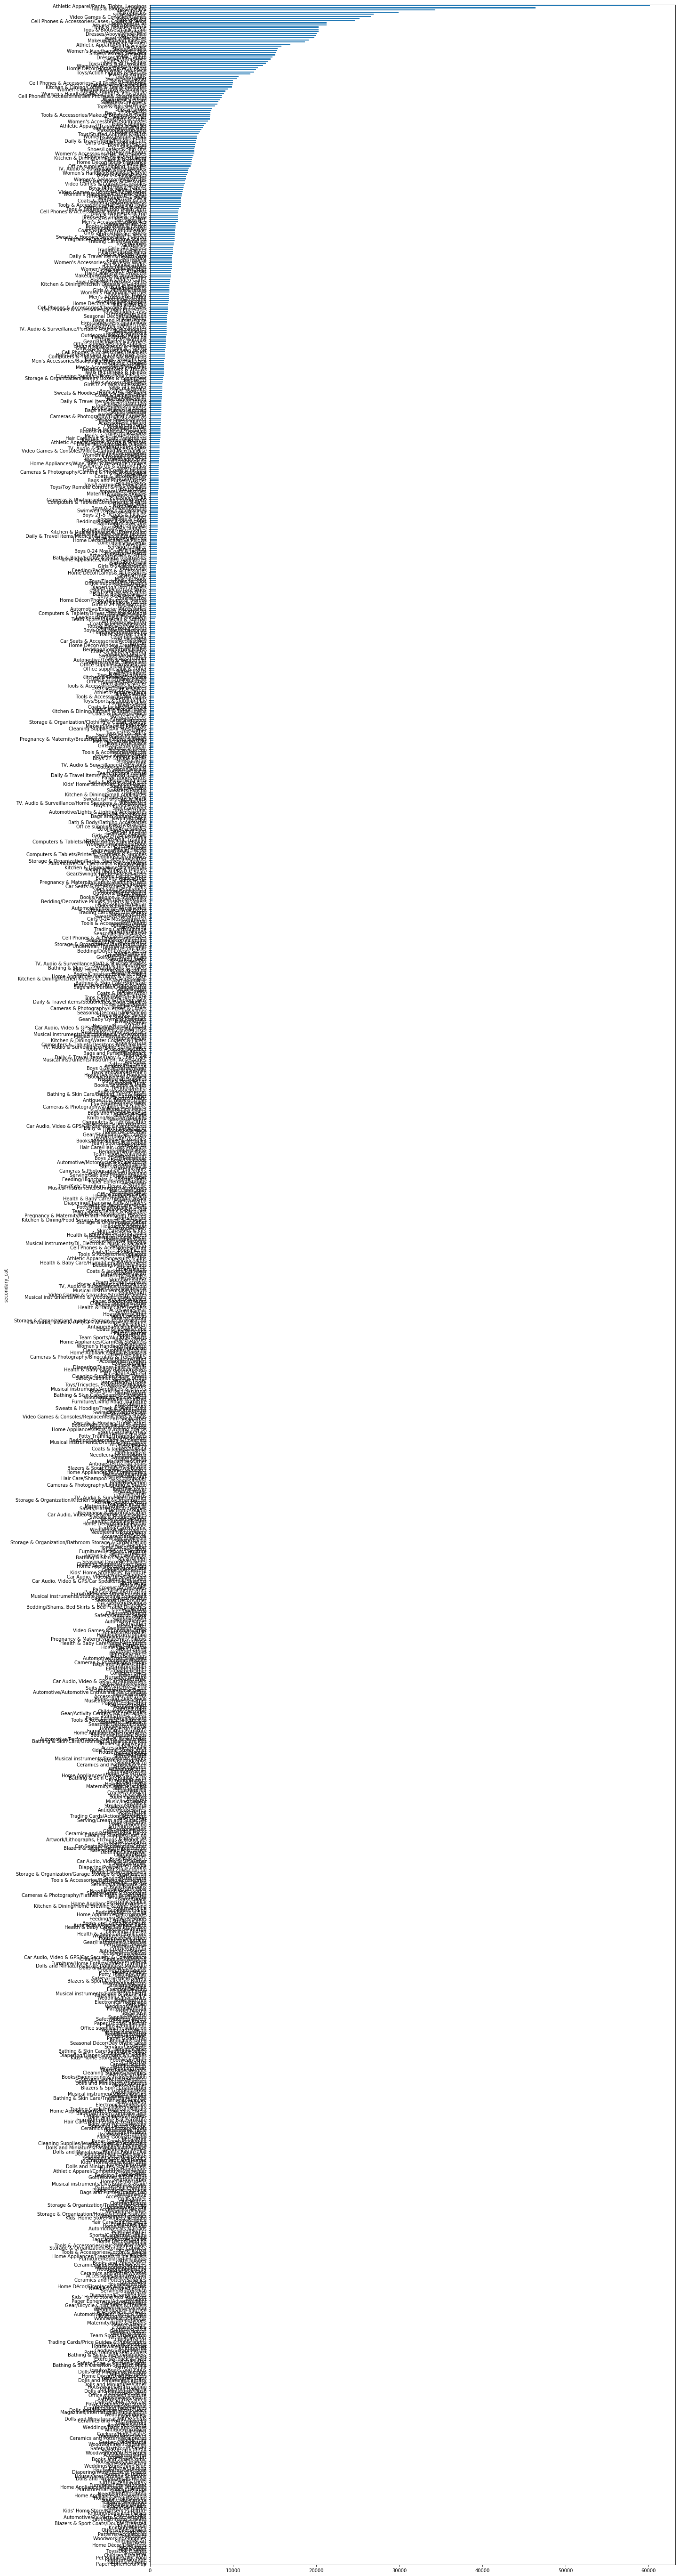

In [27]:
#Secondary Category Breakout: Count

plt.figure(figsize=(20,100))
train.name.groupby(train.secondary_cat).count().sort_values(ascending=True).plot(kind = 'barh')
plt.show()

In [28]:
train = train.apply(lambda x: x.astype(str).str.lower())
test = test.apply(lambda x: x.astype(str).str.lower())
train['log_price'] = pd.to_numeric(train.log_price)
train['price'] = pd.to_numeric(train.price)
train['item_condition_id'] = pd.to_numeric(train.item_condition_id)
train['shipping'] = pd.to_numeric(train.shipping)

test['item_condition_id'] = pd.to_numeric(test.item_condition_id)
test['shipping'] = pd.to_numeric(test.shipping)

In [29]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,primary_cat,secondary_cat
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,nan,10.0,1,no description yet,2.397895,men,tops/t-shirts
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,3.970292,electronics,computers & tablets/components & parts
2,2,ava-viv blouse,1,women/tops & blouses/blouse,target,10.0,1,adorable top with a hint of lace and a key hol...,2.397895,women,tops & blouses/blouse
3,3,leather horse statues,1,home/home décor/home décor accents,nan,35.0,1,new with tags. leather horses. retail for [rm]...,3.583519,home,home décor/home décor accents
4,4,24k gold plated rose,1,women/jewelry/necklaces,nan,44.0,0,complete with certificate of authenticity,3.806662,women,jewelry/necklaces


In [30]:
train.dtypes

train_id              object
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
log_price            float64
primary_cat           object
secondary_cat         object
dtype: object

In [31]:
text_features = ['name', 'brand_name', 'category_name', 'primary_cat', 'secondary_cat', 'item_description']
for i in text_features:
    train[i].replace(regex=True,inplace=True,to_replace=r'\W',value=r' ')
    
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,primary_cat,secondary_cat
0,0,mlb cincinnati reds t shirt size xl,3,men tops t shirts,nan,10.0,1,no description yet,2.397895,men,tops t shirts
1,1,razer blackwidow chroma keyboard,3,electronics computers tablets components p...,razer,52.0,0,this keyboard is in great condition and works ...,3.970292,electronics,computers tablets components parts
2,2,ava viv blouse,1,women tops blouses blouse,target,10.0,1,adorable top with a hint of lace and a key hol...,2.397895,women,tops blouses blouse
3,3,leather horse statues,1,home home décor home décor accents,nan,35.0,1,new with tags leather horses retail for rm ...,3.583519,home,home décor home décor accents
4,4,24k gold plated rose,1,women jewelry necklaces,nan,44.0,0,complete with certificate of authenticity,3.806662,women,jewelry necklaces


In [32]:
train = train.replace([np.nan,'nan'], 'none', regex=True)
test = test.replace([np.nan,'nan'], 'none', regex=True)

In [33]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,primary_cat,secondary_cat
0,0,mlb cincinnati reds t shirt size xl,3,men tops t shirts,none,10.0,1,no description yet,2.397895,men,tops t shirts
1,1,razer blackwidow chroma keyboard,3,electronics computers tablets components p...,razer,52.0,0,this keyboard is in great condition and works ...,3.970292,electronics,computers tablets components parts
2,2,ava viv blouse,1,women tops blouses blouse,target,10.0,1,adorable top with a hint of lace and a key hol...,2.397895,women,tops blouses blouse
3,3,leather horse statues,1,home home décor home décor accents,none,35.0,1,new with tags leather horses retail for rm ...,3.583519,home,home décor home décor accents
4,4,24k gold plated rose,1,women jewelry necklaces,none,44.0,0,complete with certificate of authenticity,3.806662,women,jewelry necklaces


## III. Brand Names

In [34]:
train.brand_name.value_counts()

none                             632679
pink                              54088
nike                              54043
victoria s secret                 48036
lularoe                           31024
apple                             17322
forever 21                        15186
nintendo                          15007
lululemon                         14558
michael kors                      13928
american eagle                    13254
rae dunn                          12305
sephora                           12172
coach                             10463
disney                            10359
bath   body works                 10354
adidas                            10202
funko                              9237
under armour                       8461
sony                               7994
old navy                           7567
hollister                          6948
carter s                           6385
urban decay                        6210
the north face                     6172


## IV. Item Description

In [35]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from nltk import FreqDist
stop = stopwords.words('english') + list(string.punctuation)

In [36]:
train['corpus_dict'] = train['item_description'].apply(lambda x: [item for item in x if item not in stop])

In [37]:
train['corpus_dict']

0                                [n,  , e, c, r, p, n,  , e]
1          [h,  , k, e, b, r,  ,  , n,  , g, r, e,  , c, ...
2          [r, b, l, e,  , p,  , w, h,  ,  , h, n,  , f, ...
3          [n, e, w,  , w, h,  , g,  ,  , l, e, h, e, r, ...
4          [c, p, l, e, e,  , w, h,  , c, e, r, f, c, e, ...
5          [b, n, n, e,  , r, e, p, u, b, l, c,  , b,  , ...
6          [z, e,  , l, l,  , b, u,  , r, p,  , l, g, h, ...
7          [u,  , g, e,  , h, r, e, e,  , p, r,  , f,  , ...
8          [g, r, l,  , z, e,  , l, l,  , p, l, u,  , g, ...
9          [ , r, e, l, z, e,  , h,  , p, n,  , r, e,  , ...
10         [0,  , 2, 5,  , z,  , f, u, l, l,  , z, e,  , ...
11         [ , 5,  ,  , n, e, w,  , v,  , p, n, k,  , b, ...
12                         [x, l,  ,  , g, r, e,  , c, n, n]
13                               [n,  , e, c, r, p, n,  , e]
14         [u, h, e, n, c,  ,  , u, e, e,  , f, r, n, g, ...
15         [b, r, n,  , n, e, w,  ,  , e, l, u, x, e,  , ...
16         [2,  , g, l, 

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
set(stopwords.words('english'))

train['tokenized_text'] = train['item_description'].apply(word_tokenize) 

In [ ]:
train['tokenized_text'].head()

In [ ]:

corpus = train['tokenized_text'].values.tolist()

In [ ]:
import itertools
flat_corpus = list(itertools.chain(*corpus))

In [ ]:
flat_corpus

In [ ]:
fdist = FreqDist(flat_corpus)
fdist.most_common(20)

Target Variable comparison to features

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(np.hstack([train.name]))
train['name'] = le.transform(train.name)
le.fit(np.hstack(train['brand_name'].astype(str)))
train['brand_name'] = le.transform(train['brand_name'].astype(str))
le.fit(np.hstack(train['primary_cat'].astype(str)))
train['primary_cat'] = le.transform(train['primary_cat'].astype(str))
le.fit(np.hstack(train['secondary_cat']).astype(str))
train["secondary_cat"] = le.transform(train['secondary_cat'].astype(str))
le.fit(np.hstack(train['item_description']).astype(str))
train["item_description"] = le.transform(train['item_description'].astype(str))


columns = list(train.columns)
plt.figure(figsize = (10, 10))
sns.heatmap(train[columns].corr(), annot = True, linewidth = 0.5)
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('log_price ~ name',train).fit()
print(m.summary())

In [ ]:
m = ols('price ~ name',train).fit()
print(m.summary())

In [ ]:
y = train.log_price
feature = [train['name'], train['item_condition_id'], train['category_name'], train['brand_name'],train['price'], train['shipping'], train['item_description']]
count = 0
for x in feature:
    print(feature[0].column, scipy.stats.ttest_ind(x, y, equal_var=False))
    count += 1